# Doing a first test of the K-S strategy

The idea here is to simulate values of $T_{2}^{3}$ (the coalescence time

1. Fix a pair $(n, M)$

2. Simulate values of $(T_{3}, T_{2}^{(3)})$ under a structured model considering that genes are sampled from the same deme. (Simulation can be done by using ms or other). 

3. We only keep the values of $T_{2}^{(3)}$. The simulated values depend on $(n, M)$

4. We compare this theoretical distribution of $T_{2}^{(3, \lambda)}$ with the simulated values of $T_{2}^{(3)}$ by using a KS test.


Note that under a panmictic model with population size change function $\lambda$, the distribution of $T_{2}^{(3, \lambda)}$ is given by:

$$P(T_2^{(3),\lambda} > u)=\int_0^{\infty} \left(\frac{1-F_{T_3}(t+u)}{1-F_{T_3}(t)}\right)^{1/3}f_{T_3}(t)dt$$

Where $F_{T_{3}}$ and $f_{T_{3}}$ are the $cdf$ and $pdf$ of $T_{3}$

We know that for any values $(n, M)$ there exists an $IICR$ or $\lambda$ such that:

$$F_{T_3^{(\lambda)}} = F_{T_{3}^{(n, M)}}$$

and we know that:

$$F_{T_{3}^{(n, M)}}(t)=P_{t}(1,4) + P_{t}(1, 5)$$

and

$$f_{T_{3}^{(n, M)}}=3P_{t}(1, 1) + P_{t}(1,2)$$

We use this formula to compute the theoretical distribution of $T_{2}^{(3, \lambda)}$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import simulateT2T3, construct_cdf_pdf, cdf_T2_3_lambda, cdf_T2_3_str, cdf_T3_str

% matplotlib inline

n = 10
M = 1

ms_command = 'ms 3 100000 -L -I 10 3 0 0 0 0 0 0 0 0 0 1'

# Simulate (T2, T3) values using a ms-command
(T2_values, T3_values) = simulateT2T3(ms_command)

# Rescaling ms times
# When a time comming from ms is equal to 1, it means 4N generations
# In the scale of the model we use, t=1 means 2N generations.
# Hence, in order to work with the same scale, we have to multiply
# by 2 the values of time produced by ms
T2_values = [2*float(t) for t in T2_values]
T3_values = [2*float(t) for t in T3_values]


In [2]:
# Compute the empirical cdf of T2_struct from T2_values
#bins = np.arange(0, max(T2_values), 0.01)
bins_empirical = np.arange(0, max(T2_values), 0.01)
bins_empirical_3 = np.arange(0, max(T3_values), 0.01)
bins_theor = np.arange(0, 5, 0.01)
(empirical_T2_pdf, empirical_T2_cdf) = construct_cdf_pdf(T2_values, bins_empirical)
(empirical_T3_pdf, empirical_T3_cdf) = construct_cdf_pdf(T3_values, bins_empirical_3)



In [3]:
# Compute the theoretical distribution of T_2_3_lambda

#theor_T2_lambda = [cdf_T2_3_lambda(u, n, M) for u in bins_theor]
theor_T2_str = [cdf_T2_3_str(u, n, M) for u in bins_theor]
theor_T3_str = [cdf_T3_str(u, n, M) for u in bins_theor]

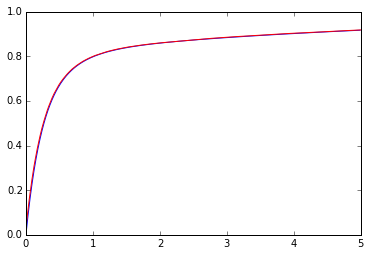

In [4]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bins_theor, theor_T3_str, '-b', label=r"Theoretical cdf of $T_{3}^{(3), n, M}$")
ax.plot(bins_empirical_3[:-1], empirical_T3_cdf, '-r', label=r"Empirical cdf of $T_{3}^{(3), n, M}$")

#ax.plot(bins_theor, theor_T2_str, '-b', label=r"Theoretical cdf of $T_{2}^{(3), n, M}$")
#ax.plot(bins_empirical[:-1], empirical_T3_cdf, '-r', label=r"Empirical cdf of $T_{2}^{(3), n, M}$")

#ax.plot(bins_theor, theor_T2_str, '-b', label=r"Theoretical cdf of $T_{2}^{(3), n, M}$")
#ax.plot(bins_theor, theor_T2_lambda, '-r', label=r"Theoretical cdf of $T_{2}^{(3), \lambda}$")

ax.set_xlim(0, 5)

#a.set_ylabel(r"cdf of $T_{2}^{3, \lambda}$")
plt.show()